In [16]:
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem, Draw
import numpy as np
import pandas as pd
from ggplot import *
from sklearn.decomposition import PCA

In [7]:
mols = []
with open("ch08_compounds.txt") as f:
    header = f.readline()
    smiles_index = -1
    for i, title in enumerate(header.split("\t")):
        if title == "CANONICAL_SMILES":
            smiles_index = i
    for l in f:
        smi = l.split("\t")[smiles_index]
        mol = Chem.MolFromSmiles(smi)
        mols.append(mol)

In [10]:
fps = []
for mol in mols:
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2)
    arr = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(fp, arr)
    fps.append(arr)
fps = np.array(fps)

In [13]:
pca = PCA(n_components=2)
x = pca.fit_transform(fps)

In [29]:
d = pd.DataFrame(x)
d.columns = ["PCA1", "PCA2"]
g = ggplot(aes(x="PCA1", y="PCA2"), data=d) + geom_point() + xlab("PCA1") + ylab("PCA2")

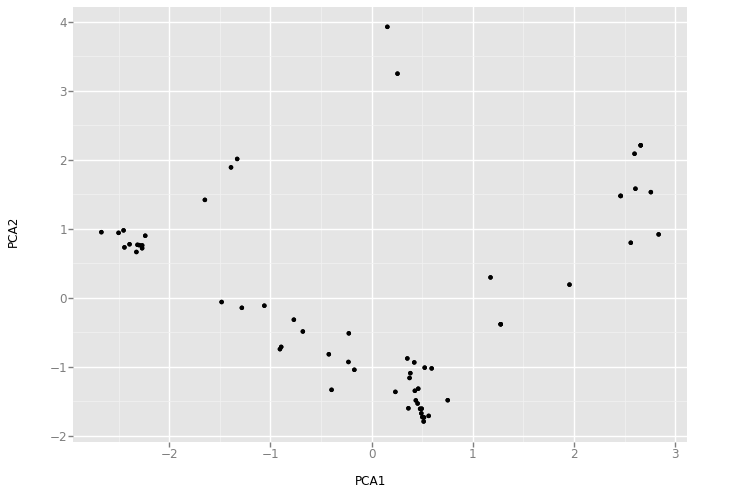

<ggplot: (-9223372029303819583)>

In [30]:
g

In [19]:
from sklearn.manifold import TSNE

In [20]:
tsne = TSNE(n_components=2, random_state=0)
tx = tsne.fit_transform(fps)

In [21]:
d = pd.DataFrame(tx)
d.columns = ["PCA1", "PCA2"]
g = ggplot(aes(x="PCA1", y="PCA2"), data=d) + geom_point() + xlab("PCA1") + ylab("PCA2")

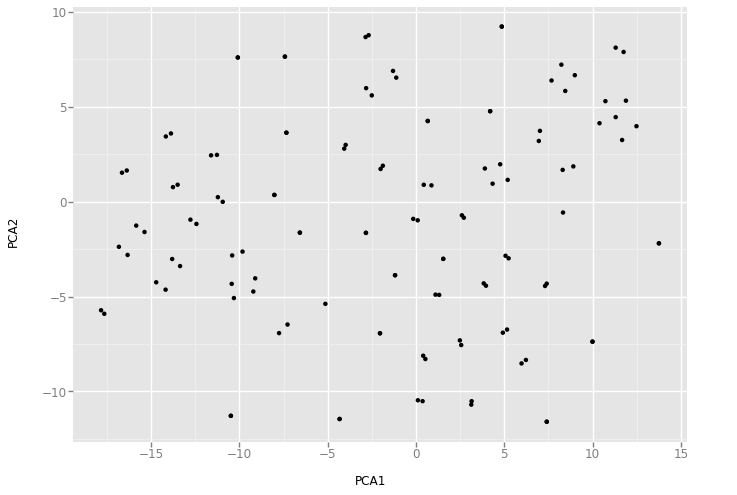

<ggplot: (-9223372029317803811)>

In [27]:
g